# Imports

In [1]:
import numpy as np
import pandas as pd
import os
from textblob import TextBlob   # to make sentiment analysis

# Load and Examine Data

In [2]:
combined_news_data = pd.read_csv('stocknews/Combined_News_DJIA.csv', index_col='Date')
combined_news_data.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
8/13/2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears

In [3]:
stock_numerical_data = pd.read_csv('stocknews/upload_DJIA_table.csv', index_col='Date')
stock_numerical_data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
7/1/2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
6/30/2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
6/29/2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
6/28/2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
6/27/2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023
...,...,...,...,...,...,...
8/14/2008,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969
8/13/2008,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
8/12/2008,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973


# Prepare Data
## Finding Columns with Null Values in Combined News Data

In [4]:
# columns with null data in combined_news_data
combined_news_data.columns[combined_news_data.isna().any()].tolist()

['Top23', 'Top24', 'Top25']

In [5]:
combined_news_data.Top23.nunique()

1988

Filling each topic with the same value as previous one

In [6]:
## filling 'Top23' with the same value as the 'Top22'
#combined_news_data['Top23'].fillna(combined_news_data.Top22, inplace=True)
## filling 'Top24' with the same value as the 'Top23'
#combined_news_data['Top24'].fillna(combined_news_data.Top23, inplace=True)
## filling 'Top25' with the same value as the 'Top24'
#combined_news_data['Top25'].fillna(combined_news_data.Top24, inplace=True)

In [7]:
for i in range(2,26):
    combined_news_data[f"Top{i}"].fillna(combined_news_data[f"Top{i-1}"], inplace=True)

In [8]:
combined_news_data.columns[combined_news_data.isna().any()].tolist()

[]

## Sentiment Analysis to All Topics
Getting the polarity and subjectivity to each topic

Polarity is of 'float' type and lies in the range of -1,1, where 1 means a high positive sentiment, and -1 means a high negative sentiment.

Subjectivity is also of 'float' type and lies in the range of 0,1. The value closer to 1 indicates that the sentence is mostly a public opinion and not a factual piece of information and vice versa.

In [9]:
# getting polarity and subjectivity for all topics Top1 to Top25
for i in range(1,26):
    combined_news_data[f"Top{i}_polarity"] = combined_news_data[f"Top{i}"].map(lambda a: TextBlob(a).sentiment[0])
    combined_news_data[f"Top{i}_subjectivity"] = combined_news_data[f"Top{i}"].map(lambda a: TextBlob(a).sentiment[1])

In [10]:
combined_news_data.Top3_subjectivity.nunique()

378

Dropping all news topics

In [11]:
for i in range(1,26):
    combined_news_data.drop([f"Top{i}"], axis='columns', inplace=True)

In [12]:
combined_news_data

,Label,Top1_polarity,Top1_subjectivity,Top2_polarity,Top2_subjectivity,Top3_polarity,Top3_subjectivity,Top4_polarity,Top4_subjectivity,Top5_polarity,Top5_subjectivity,Top6_polarity,Top6_subjectivity,Top7_polarity,Top7_subjectivity,Top8_polarity,Top8_subjectivity,Top9_polarity,Top9_subjectivity,Top10_polarity,Top10_subjectivity,Top11_polarity,Top11_subjectivity,Top12_polarity,Top12_subjectivity,Top13_polarity,Top13_subjectivity,Top14_polarity,Top14_subjectivity,Top15_polarity,Top15_subjectivity,Top16_polarity,Top16_subjectivity,Top17_polarity,Top17_subjectivity,Top18_polarity,Top18_subjectivity,Top19_polarity,Top19_subjectivity,Top20_polarity,Top20_subjectivity,Top21_polarity,Top21_subjectivity,Top22_polarity,Top22_subjectivity,Top23_polarity,Top23_subjectivity,Top24_polarity,Top24_subjectivity,Top25_polarity,Top25_subjectivity
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8/8/2008,0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.050000,0.200000,-0.307143,0.528571,-0.051852,0.096296,0.000,0.000000,-0.200000,0.300000,-0.100000,0.000000,0.000000,0.000000,0.033333,0.366667,0.033333,0.055556,-0.033333,0.600000,-0.125000,0.375000,0.000000,0.000000,0.350000,0.550000,0.000000,0.000000,-0.100000,0.100000,0.078788,0.251515,0.000000,0.000000,-0.700000,0.666667,0.000000,0.000000,0.000000,0.000000,-0.100000,0.200000,0.000000,0.000000
8/11/2008,1,0.000000,0.000000,-0.155556,0.288889,0.10,0.100000,0.000000,0.000000,0.000000,0.000000,0.136364,0.454545,-0.425,0.475000,0.250000,0.350000,0.600000,0.720000,0.000000,0.000000,0.000000,0.000000,0.183333,0.311111,0.000000,0.000000,0.136364,0.454545,0.000000,0.000000,-0.400000,0.700000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
8/12/2008,0,0.000000,1.000000,0.000000,0.000000,-0.25,0.833333,-0.875000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.022222,0.344444,-0.025000,0.275000,0.000000,0.000000,0.038095,0.176190,-0.150000,0.200000,0.000000,0.000000,0.214286,0.428571,0.500000,0.500000,0.250000,0.333333,0.285714,0.535714,-0.333333,0.666667,-0.600000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.350000,0.136364,0.454545,0.000000,0.000000
8/13/2008,0,0.000000,0.000000,0.000000,0.000000,-0.20,0.000000,-0.212963,0.444444,0.175000,0.383333,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.900000,-0.166667,0.433333,0.000000,0.000000,0.133333,0.500000,0.000000,0.000000,0.285714,0.535714,-0.400000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.100000,0.000000,0.000000
8/14/2008,1,0.000000,0.000000,0.000000,0.000000,0.40,0.400000,-0.233333,0.666667,-0.200000,0.000000,-0.500000,0.500000,0.625,0.500000,0.166667,0.666667,0.000000,0.100000,-0.100000,0.400000,0.000000,0.000000,0.285714,0.535714,0.000000,1.000000,0.550000,0.950000,-0.025000,0.225000,0.100000,0.300000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.068182,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/27/2016,0,0.500000,0.500000,-0.250000,0.250000,-0.70,0.800000,0.000000,0.000000,0.800000,0.900000,0.000000,0.300000,0.075,0.200000,-0.400000,0.500000,-0.083333,0.216667,0.000000,0.000000,-0.116667,0.444444,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.100000,0.200000,-0.050000,0.050000,0.275000,0.700000,0.000000,0.000000,-0.250000,0.500000,0.136364,0.454545,0.006667,0.413333,0.000000,0.000000,0.000000,0.300000,0.034091,0.238636,0.200000,0.200000
6/28/2016,1,0.525000,0.500000,0.000000,0.150000,0.00,0.000000,0.400000,0.900000,-0.100000,0.233333,-1.000000,1.000000,0.125,0.16666

## Finding Columns with Null Values in Stock Numerical Data

In [13]:
# columns with null data in stock_numerical_data
stock_numerical_data.columns[stock_numerical_data.isna().any()].tolist()

[]

## Merging All Data

In [14]:
merged_data = combined_news_data.merge(stock_numerical_data, how='inner', on='Date')#, left_index=True)
merged_data.head()

,Label,Top1_polarity,Top1_subjectivity,Top2_polarity,Top2_subjectivity,Top3_polarity,Top3_subjectivity,Top4_polarity,Top4_subjectivity,Top5_polarity,Top5_subjectivity,Top6_polarity,Top6_subjectivity,Top7_polarity,Top7_subjectivity,Top8_polarity,Top8_subjectivity,Top9_polarity,Top9_subjectivity,Top10_polarity,Top10_subjectivity,Top11_polarity,Top11_subjectivity,Top12_polarity,Top12_subjectivity,Top13_polarity,Top13_subjectivity,Top14_polarity,Top14_subjectivity,Top15_polarity,Top15_subjectivity,Top16_polarity,Top16_subjectivity,Top17_polarity,Top17_subjectivity,Top18_polarity,Top18_subjectivity,Top19_polarity,Top19_subjectivity,Top20_polarity,Top20_subjectivity,Top21_polarity,Top21_subjectivity,Top22_polarity,Top22_subjectivity,Top23_polarity,Top23_subjectivity,Top24_polarity,Top24_subjectivity,Top25_polarity,Top25_subjectivity,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8/8/2008,0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.050000,0.200000,-0.307143,0.528571,-0.051852,0.096296,0.000,0.000,-0.200000,0.300000,-0.100,0.000,0.0,0.0,0.033333,0.366667,0.033333,0.055556,-0.033333,0.6,-0.125000,0.375000,0.000000,0.000000,0.35,0.550000,0.000000,0.000000,-0.100000,0.100000,0.078788,0.251515,0.000000,0.00,-0.7,0.666667,0.0,0.0,0.0,0.00,-0.100000,0.200000,0.0,0.0,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
8/11/2008,1,0.0,0.0,-0.155556,0.288889,0.10,0.100000,0.000000,0.000000,0.000000,0.000000,0.136364,0.454545,-0.425,0.475,0.250000,0.350000,0.600,0.720,0.0,0.0,0.000000,0.000000,0.183333,0.311111,0.000000,0.0,0.136364,0.454545,0.000000,0.000000,-0.40,0.700000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.500000,0.500000,0.0,0.0,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
8/12/2008,0,0.0,1.0,0.000000,0.000000,-0.25,0.833333,-0.875000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.022222,0.344444,-0.025,0.275,0.0,0.0,0.038095,0.176190,-0.150000,0.200000,0.000000,0.0,0.214286,0.428571,0.500000,0.500000,0.25,0.333333,0.285714,0.535714,-0.333333,0.666667,-0.600000,1.000000,0.000000,1.00,0.0,0.000000,0.0,0.0,-0.2,0.35,0.136364,0.454545,0.0,0.0,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
8/13/2008,0,0.0,0.0,0.000000,0.000000,-0.20,0.000000,-0.212963,0.444444,0.175000,0.383333,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.5,0.9,-0.166667,0.433333,0.000000,0.000000,0.133333,0.5,0.000000,0.000000,0.285714,0.535714,-0.40,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,-0.100000,0.100000,0.0,0.0,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
8/14/2008,1,0.0,0.0,0.000000,0.000000,0.40,0.400000,-0.233333,0.666667,-0.200000,0.000000,-0.500000,0.500000,0.625,0.500,0.166667,0.666667,0.000,0.100,-0.1,0.4,0.000000,0.000000,0.285714,0.535714,0.000000,1.0,0.550000,0.950000,-0.025000,0.225000,0.10,0.300000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.068182,0.25,0.0,0.000000,0.0,0.0,0.0,0.00,0.062500,0.500000,0.0,0.0,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


# EDA

In [15]:
merged_data.describe()

,Label,Top1_polarity,Top1_subjectivity,Top2_polarity,Top2_subjectivity,Top3_polarity,Top3_subjectivity,Top4_polarity,Top4_subjectivity,Top5_polarity,Top5_subjectivity,Top6_polarity,Top6_subjectivity,Top7_polarity,Top7_subjectivity,Top8_polarity,Top8_subjectivity,Top9_polarity,Top9_subjectivity,Top10_polarity,Top10_subjectivity,Top11_polarity,Top11_subjectivity,Top12_polarity,Top12_subjectivity,Top13_polarity,Top13_subjectivity,Top14_polarity,Top14_subjectivity,Top15_polarity,Top15_subjectivity,Top16_polarity,Top16_subjectivity,Top17_polarity,Top17_subjectivity,Top18_polarity,Top18_subjectivity,Top19_polarity,Top19_subjectivity,Top20_polarity,Top20_subjectivity,Top21_polarity,Top21_subjectivity,Top22_polarity,Top22_subjectivity,Top23_polarity,Top23_subjectivity,Top24_polarity,Top24_subjectivity,Top25_polarity,Top25_subjectivity,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,0.535445,0.019267,0.272740,0.014914,0.258760,0.018326,0.261891,0.014879,0.255235,0.015488,0.262211,0.020028,0.255921,0.005490,0.248149,0.016982,0.261718,0.006367,0.250315,0.011769,0.244052,0.012726,0.250559,0.016454,0.242256,0.013680,0.249237,0.010425,0.239041,0.012103,0.239466,0.006671,0.241369,0.005763,0.235753,0.017305,0.236506,0.008739,0.240661,0.018752,0.236614,0.002095,0.237540,0.008238,0.229045,0.010008,0.236695,0.013973,0.230313,0.003111,0.242685,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,0.498867,0.212740,0.278340,0.207036,0.283947,0.215765,0.283778,0.217783,0.276885,0.206558,0.277099,0.207959,0.277298,0.204787,0.275589,0.214224,0.287079,0.208960,0.278606,0.197674,0.273926,0.203239,0.279825,0.194025,0.274257,0.199736,0.279887,0.201106,0.280134,0.203475,0.281765,0.205585,0.282464,0.199485,0.278584,0.203624,0.275911,0.203774,0.279075,0.200000,0.274662,0.200720,0.277547,0.193070,0.275958,0.207886,0.275156,0.197430,0.276200,0.205945,0.280849,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,0.000000,-0.015909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008333,0.000000,-0.005524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007500,0.000000,0.000000,0.000000,-0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08,10913.379880
50%,1.000000,0.000000,0.238889,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.170909,0.000000,0.200000,0.000000,0.175000,0.000000,0.166667,0.000000,0.166667,0.000000,0.151515,0.000000,0.166667,

In [16]:
merged_data.shape

(1989, 57)

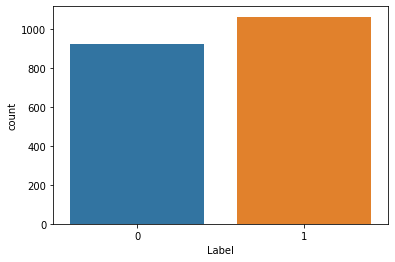

In [17]:
#count plot of column label -- to see imbalance of data
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Label', data=merged_data)
plt.show()

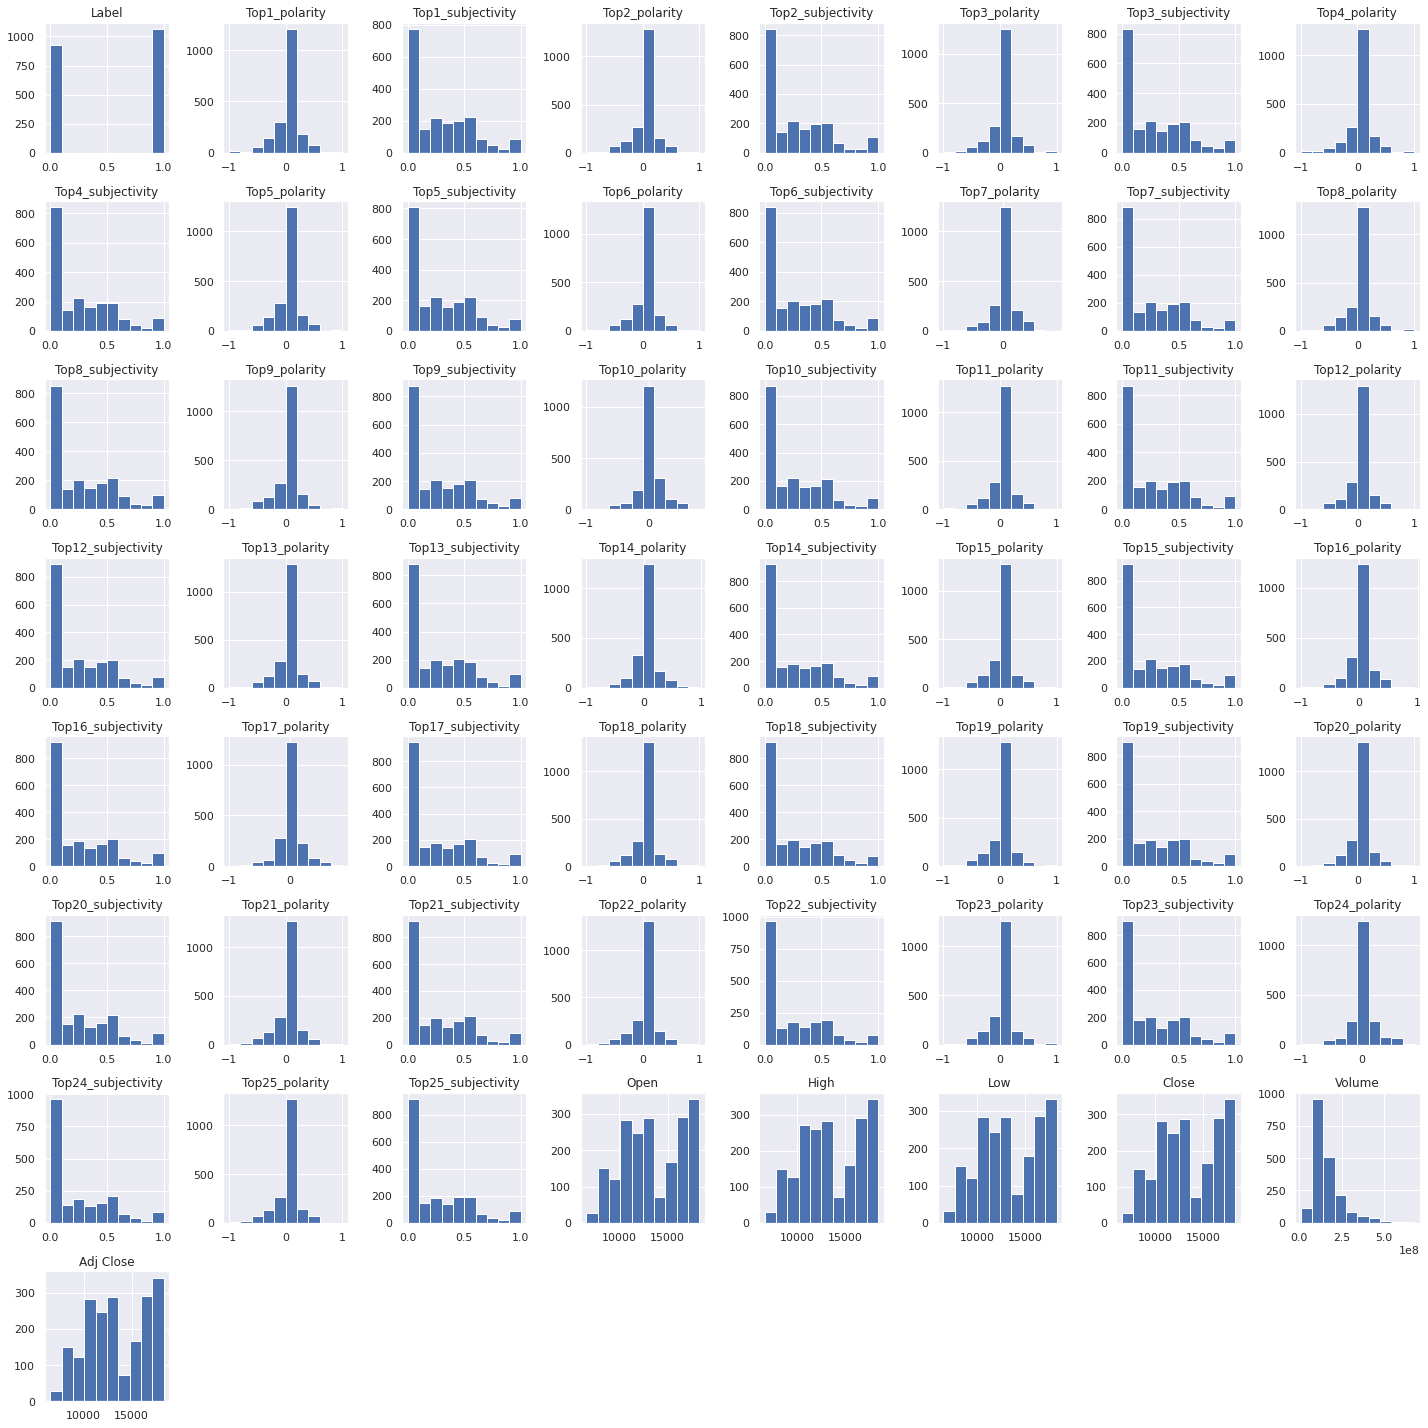

In [18]:
# plot histogram of all the columns to see distribution 
sns.set()
merged_data.hist(sharex = False, sharey = False, figsize=(20, 20))

plt.tight_layout()
plt.show()

In [19]:
merged_data.columns

Index(['Label', 'Top1_polarity', 'Top1_subjectivity', 'Top2_polarity',
       'Top2_subjectivity', 'Top3_polarity', 'Top3_subjectivity',
       'Top4_polarity', 'Top4_subjectivity', 'Top5_polarity',
       'Top5_subjectivity', 'Top6_polarity', 'Top6_subjectivity',
       'Top7_polarity', 'Top7_subjectivity', 'Top8_polarity',
       'Top8_subjectivity', 'Top9_polarity', 'Top9_subjectivity',
       'Top10_polarity', 'Top10_subjectivity', 'Top11_polarity',
       'Top11_subjectivity', 'Top12_polarity', 'Top12_subjectivity',
       'Top13_polarity', 'Top13_subjectivity', 'Top14_polarity',
       'Top14_subjectivity', 'Top15_polarity', 'Top15_subjectivity',
       'Top16_polarity', 'Top16_subjectivity', 'Top17_polarity',
       'Top17_subjectivity', 'Top18_polarity', 'Top18_subjectivity',
       'Top19_polarity', 'Top19_subjectivity', 'Top20_polarity',
       'Top20_subjectivity', 'Top21_polarity', 'Top21_subjectivity',
       'Top22_polarity', 'Top22_subjectivity', 'Top23_polarity',
      

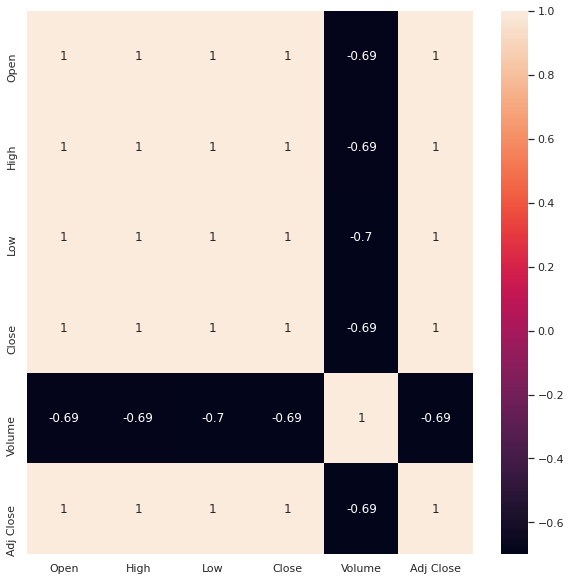

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(merged_data[['Open', 'High', 'Low', 'Close',
       'Volume', 'Adj Close']].corr(), annot= True)

In [21]:
#Importing libraries
import plotly
import cufflinks
#import chart_studio

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

In [22]:
merged_data.reset_index(inplace= True)

In [23]:
merged_data.head()

,Date,Label,Top1_polarity,Top1_subjectivity,Top2_polarity,Top2_subjectivity,Top3_polarity,Top3_subjectivity,Top4_polarity,Top4_subjectivity,Top5_polarity,Top5_subjectivity,Top6_polarity,Top6_subjectivity,Top7_polarity,Top7_subjectivity,Top8_polarity,Top8_subjectivity,Top9_polarity,Top9_subjectivity,Top10_polarity,Top10_subjectivity,Top11_polarity,Top11_subjectivity,Top12_polarity,Top12_subjectivity,Top13_polarity,Top13_subjectivity,Top14_polarity,Top14_subjectivity,Top15_polarity,Top15_subjectivity,Top16_polarity,Top16_subjectivity,Top17_polarity,Top17_subjectivity,Top18_polarity,Top18_subjectivity,Top19_polarity,Top19_subjectivity,Top20_polarity,Top20_subjectivity,Top21_polarity,Top21_subjectivity,Top22_polarity,Top22_subjectivity,Top23_polarity,Top23_subjectivity,Top24_polarity,Top24_subjectivity,Top25_polarity,Top25_subjectivity,Open,High,Low,Close,Volume,Adj Close
0,8/8/2008,0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.050000,0.200000,-0.307143,0.528571,-0.051852,0.096296,0.000,0.000,-0.200000,0.300000,-0.100,0.000,0.0,0.0,0.033333,0.366667,0.033333,0.055556,-0.033333,0.6,-0.125000,0.375000,0.000000,0.000000,0.35,0.550000,0.000000,0.000000,-0.100000,0.100000,0.078788,0.251515,0.000000,0.00,-0.7,0.666667,0.0,0.0,0.0,0.00,-0.100000,0.200000,0.0,0.0,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1,8/11/2008,1,0.0,0.0,-0.155556,0.288889,0.10,0.100000,0.000000,0.000000,0.000000,0.000000,0.136364,0.454545,-0.425,0.475,0.250000,0.350000,0.600,0.720,0.0,0.0,0.000000,0.000000,0.183333,0.311111,0.000000,0.0,0.136364,0.454545,0.000000,0.000000,-0.40,0.700000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.500000,0.500000,0.0,0.0,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
2,8/12/2008,0,0.0,1.0,0.000000,0.000000,-0.25,0.833333,-0.875000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.022222,0.344444,-0.025,0.275,0.0,0.0,0.038095,0.176190,-0.150000,0.200000,0.000000,0.0,0.214286,0.428571,0.500000,0.500000,0.25,0.333333,0.285714,0.535714,-0.333333,0.666667,-0.600000,1.000000,0.000000,1.00,0.0,0.000000,0.0,0.0,-0.2,0.35,0.136364,0.454545,0.0,0.0,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
3,8/13/2008,0,0.0,0.0,0.000000,0.000000,-0.20,0.000000,-0.212963,0.444444,0.175000,0.383333,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.5,0.9,-0.166667,0.433333,0.000000,0.000000,0.133333,0.5,0.000000,0.000000,0.285714,0.535714,-0.40,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,-0.100000,0.100000,0.0,0.0,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
4,8/14/2008,1,0.0,0.0,0.000000,0.000000,0.40,0.400000,-0.233333,0.666667,-0.200000,0.000000,-0.500000,0.500000,0.625,0.500,0.166667,0.666667,0.000,0.100,-0.1,0.4,0.000000,0.000000,0.285714,0.535714,0.000000,1.0,0.550000,0.950000,-0.025000,0.225000,0.10,0.300000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.068182,0.25,0.0,0.000000,0.0,0.0,0.0,0.00,0.062500,0.500000,0.0,0.0,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as px

fig = make_subplots(rows=2, cols=1)

# Active Power

fig.append_trace(go.Scatter(
    x=merged_data["Date"],
   y=merged_data['Open'], mode='lines', name='Open', hovertemplate='Date & Time: %{x}'+'<br>Open: %{y}'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=merged_data["Date"],
   y=merged_data['High'], mode='lines', name='High', hovertemplate='Date & Time: %{x}'+'<br>High: %{y}'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=merged_data["Date"],
   y=merged_data['Low'], mode='lines', name='Low', hovertemplate='Date & Time: %{x}'+'<br>Low: %{y}'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=merged_data["Date"],
   y=merged_data['Close'], mode='lines', name='Close', hovertemplate='Date & Time: %{x}'+'<br>Close: %{y}'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=merged_data["Date"],
  y=merged_data['Adj Close'], mode='lines', name='Adj Close', hovertemplate='Date & Time: %{x}'+'<br>Adj Close: %{y}'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=merged_data["Date"],
  y=merged_data['Volume'], mode='lines', name='Volume', hovertemplate='Date & Time: %{x}'+'<br>Volume: %{y}'
), row=2, col=1)

fig.update_layout(height=1000, title_text="historic stock data")

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



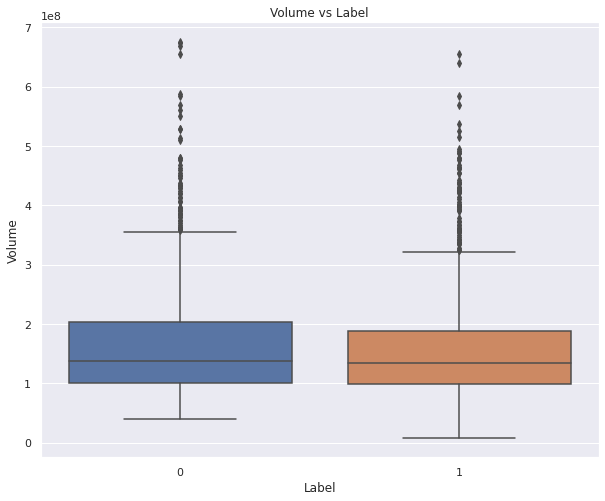

In [25]:
plt.figure(figsize=[10,8])
sns.boxplot(merged_data.Label,merged_data.Volume)
plt.title("Volume vs Label")
plt.show()

<b>We could see that there are outliers in Volume feature</b>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



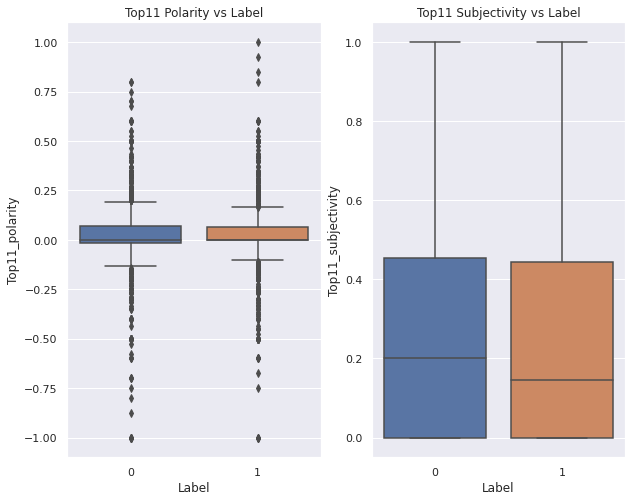

In [26]:
#Box plots for Top 11 polarity and subjectivity vs Label
plt.figure(figsize=[10,8])
plt.subplot(121)
sns.boxplot(merged_data.Label,merged_data['Top11_polarity'])
plt.title("Top11 Polarity vs Label")

plt.subplot(122)
sns.boxplot(merged_data.Label,merged_data['Top11_subjectivity'])
plt.title("Top11 Subjectivity vs Label")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



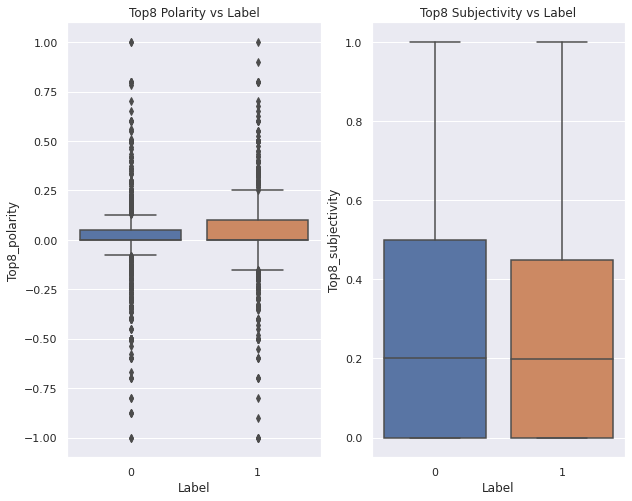

In [27]:
#Box plots for Top 8 polarity and subjectivity vs Label
plt.figure(figsize=[10,8])
plt.subplot(121)
sns.boxplot(merged_data.Label,merged_data['Top8_polarity'])
plt.title("Top8 Polarity vs Label")

plt.subplot(122)
sns.boxplot(merged_data.Label,merged_data['Top8_subjectivity'])
plt.title("Top8 Subjectivity vs Label")
plt.show()

## Merging Again
### Concatenating all topics in one paragraph.

In [28]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [29]:
data = pd.read_csv('stocknews/Combined_News_DJIA.csv', index_col='Date')
data["Top"] = data["Top1"] + data["Top2"]+data["Top3"]+data["Top4"]+data["Top5"]+\
    data["Top6"]+data["Top7"]+data["Top8"]+data["Top9"]+data["Top10"]+data["Top11"]+\
        data["Top12"]+data["Top13"]+data["Top14"]+data["Top15"]+data["Top16"]+data["Top17"]+\
            data["Top18"]+data["Top19"]+data["Top20"]+data["Top21"]+data["Top22"]+data["Top23"]+\
                data["Top24"]+data["Top25"]
            
data.drop(["Top1","Top2","Top3","Top4","Top5","Top6","Top7","Top8","Top9","Top10","Top11",\
        "Top12","Top13","Top14","Top15","Top16","Top17","Top18","Top19","Top20","Top21","Top22","Top23"\
                ,"Top24","Top25"],axis=1,inplace=True)

data.isnull().sum()

Label    0
Top      3
dtype: int64

In [30]:
#data = data.replace(np.nan, ' ', regex=True)
data.bfill(inplace=True)
data.ffill(inplace=True)

In [31]:
data.isnull().sum()

Label    0
Top      0
dtype: int64

In [32]:
data["polarity"] = data["Top"].map(lambda a: TextBlob(a).sentiment[0])
data["subjectivity"] = data[f"Top"].map(lambda a: TextBlob(a).sentiment[1])

In [33]:
data.drop(["Top"], axis='columns', inplace=True)

In [34]:
merged_data2 = data.merge(stock_numerical_data, how='inner', on='Date')#, left_index=True)
merged_data2.head()

,Label,polarity,subjectivity,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,,,
8/8/2008,0,-0.048568,0.267549,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
8/11/2008,1,0.121956,0.374806,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
8/12/2008,0,-0.046530,0.518785,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
8/13/2008,0,0.011398,0.364021,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
8/14/2008,1,0.040677,0.375099,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


In [35]:
##split merged_data
merged_data.set_index('Date',inplace= True)
# Remove rows with missing target, separate target from predictors
X = merged_data.dropna(axis=0, subset=['Label'])
y = merged_data.Label
X.drop(['Label'], axis=1, inplace=True)

# Splitting to training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

##split merged_data2

# Remove rows with missing target, separate target from predictors
X2 = merged_data2.dropna(axis=0, subset=['Label'])
y2 = merged_data2.Label
X2.drop(['Label'], axis=1, inplace=True)

# Splitting to training and validation data
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [36]:
## Scaling merged_data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledValidationX = scaler.transform(X_valid)

## Scaling merged_data2
scaler2 = StandardScaler().fit(X_train2)
rescaledX2 = scaler2.transform(X_train2)
rescaledValidationX2 = scaler2.transform(X_valid2)

In [37]:
rescaledX.shape

(1591, 56)

In [38]:
rescaledX2.shape

(1591, 8)

# Model Building

## Metrices considered for Model Evaluation

**Accuracy , Precision , Recall and F1 Score**
- Accuracy: What proportion of actual positives and negatives is correctly classified?
- Precision: What proportion of predicted positives are truly positive ?
-  Recall: What proportion of actual positives is correctly classified ?
-  F1 Score : Harmonic mean of Precision and Recall

## 1. Logistic Regression 

In [39]:
###################3logistic regrassion####################
# tfidf_vectorizer= TfidfVectorizer()
# ## fit the data with training data
# tfidf_vectorizer.fit_transform(rescaledX)

# train_idf=tfidf_vectorizer.transform(rescaledX)
# test_idf=tfidf_vectorizer.transform(rescaledValidationX)

model_logrig=LogisticRegression()
##fit the model in training data
model_logrig.fit(rescaledX,y_train)
##predict the model on training data
predict_train=model_logrig.predict(rescaledX)
##predict the model on test data
predict_test=model_logrig.predict(rescaledValidationX)

matrix = confusion_matrix(y_valid, predict_test)
print(matrix)
score = accuracy_score(y_valid, predict_test)
print(score)
report = classification_report(y_valid, predict_test)
print(report)

[[120  73]
 [ 34 171]]
0.7311557788944724
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       193
           1       0.70      0.83      0.76       205

    accuracy                           0.73       398
   macro avg       0.74      0.73      0.73       398
weighted avg       0.74      0.73      0.73       398



In [40]:
###################3logistic regrassion####################
# tfidf_vectorizer= TfidfVectorizer()
# ## fit the data with training data
# tfidf_vectorizer.fit_transform(train.Top)

# train_idf=tfidf_vectorizer.transform(train.Top)
# test_idf=tfidf_vectorizer.transform(test.Top)

model_logrig2 = LogisticRegression()
##fit the model in training data
model_logrig2.fit(rescaledX2,y_train2)
##predict the model on training data
predict_train2=model_logrig2.predict(rescaledX2)
##predict the model on test data
predict_test2=model_logrig2.predict(rescaledValidationX2)

matrix2 = confusion_matrix(y_valid2, predict_test2)
print(matrix2)
score2 = accuracy_score(y_valid2, predict_test2)
print(score2)
report2 = classification_report(y_valid2, predict_test2)
print(report2)

[[116  77]
 [  2 203]]
0.8015075376884422
              precision    recall  f1-score   support

           0       0.98      0.60      0.75       193
           1       0.72      0.99      0.84       205

    accuracy                           0.80       398
   macro avg       0.85      0.80      0.79       398
weighted avg       0.85      0.80      0.79       398



## 2. Random Forest Classifier

In [41]:
#############Random forest Classifier#######################
### Bag of word
# countvec = CountVectorizer()
# ## fit the data with training data
# countvec.fit_transform(train.Top)
# train_countvec=countvec.transform(train.Top)
# test_countvec=countvec.transform(test.Top)

model_ranforcls=RandomForestClassifier()
##fit the model in training data
model_ranforcls.fit(rescaledX,y_train)
##predict the model on training data
predict_train=model_ranforcls.predict(rescaledX)
##predict the model on test data
predict_test=model_ranforcls.predict(rescaledValidationX)
##f1 score on train data
f1_score(y_true=y_train, y_pred=predict_train)
## f1 score on test data
f1_score(y_true=y_valid, y_pred=predict_test)
print(f1_score)

matrix = confusion_matrix(y_valid, predict_test)
print(matrix)
score = accuracy_score(y_valid, predict_test)
print(score)
report = classification_report(y_valid, predict_test)
print(report)

<function f1_score at 0x7f3237c77170>
[[ 79 114]
 [ 67 138]]
0.5452261306532663
              precision    recall  f1-score   support

           0       0.54      0.41      0.47       193
           1       0.55      0.67      0.60       205

    accuracy                           0.55       398
   macro avg       0.54      0.54      0.54       398
weighted avg       0.54      0.55      0.54       398



In [42]:
model_ranforcls2=RandomForestClassifier()
##fit the model in training data
model_ranforcls2.fit(rescaledX2,y_train2)
##predict the model on training data
predict_train2=model_ranforcls2.predict(rescaledX2)
##predict the model on test data
predict_test2=model_ranforcls2.predict(rescaledValidationX2)
##f1 score on train data
f1_score(y_true=y_train2, y_pred=predict_train2)
## f1 score on test data
f1_score(y_true=y_valid2, y_pred=predict_test2)
print(f1_score)

matrix2 = confusion_matrix(y_valid2, predict_test2)
print(matrix2)
score2 = accuracy_score(y_valid2, predict_test2)
print(score)
report2 = classification_report(y_valid2, predict_test2)
print(report2)

<function f1_score at 0x7f3237c77170>
[[119  74]
 [ 43 162]]
0.5452261306532663
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       193
           1       0.69      0.79      0.73       205

    accuracy                           0.71       398
   macro avg       0.71      0.70      0.70       398
weighted avg       0.71      0.71      0.70       398



## 3. Linear Discriminant Analysis

- Linear Discriminant Analysis, or LDA, uses the information from both(selection and target) features to create a new axis and projects the data on to the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.
- Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels. LDA chooses axis to maximize the distance between points in different categories. 
- PCA performs better in case where number of samples per class is less. Whereas LDA works better with large dataset having multiple classes; class separability is an important factor while reducing dimensionality. 
- Linear Discriminant Analysis fails when the covariances of the X variables are a function of the value of Y. 

In [43]:
######################Linear Discriminant Analysis###########################
model_lda=LinearDiscriminantAnalysis()
##fit the model in training data
model_lda.fit(rescaledX,y_train)
##predict the model on training data
predict_train=model_lda.predict(rescaledX)
##predict the model on test data
predict_test=model_lda.predict(rescaledValidationX)

matrix = confusion_matrix(y_valid, predict_test)
print(matrix)
score = accuracy_score(y_valid, predict_test)
print(score)
report = classification_report(y_valid, predict_test)
print(report)

[[160  33]
 [ 16 189]]
0.8768844221105527
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       193
           1       0.85      0.92      0.89       205

    accuracy                           0.88       398
   macro avg       0.88      0.88      0.88       398
weighted avg       0.88      0.88      0.88       398



In [44]:
model_lda2 = LinearDiscriminantAnalysis()
##fit the model in training data
model_lda2.fit(rescaledX2,y_train2)
##predict the model on training data
predict_train2=model_lda2.predict(rescaledX2)
##predict the model on test data
predict_test2=model_lda2.predict(rescaledValidationX2)

matrix2 = confusion_matrix(y_valid2, predict_test2)
print(matrix2)
score2 = accuracy_score(y_valid2, predict_test2)
print(score2)
report2 = classification_report(y_valid2, predict_test2)
print(report2)

[[162  31]
 [  2 203]]
0.9170854271356784
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       193
           1       0.87      0.99      0.92       205

    accuracy                           0.92       398
   macro avg       0.93      0.91      0.92       398
weighted avg       0.93      0.92      0.92       398

